# 多项式回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读入训练数据
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)

In [4]:
train_x = train[:,0]
train_y = train[:,1]

In [5]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [6]:
train_z = standardize(train_x)

In [7]:
# 初始化参数
theta = np.random.rand(3)

In [8]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

In [9]:
X = to_matrix(train_z)

In [10]:
# 预测函数
def f(x):
    return np.dot(x, theta)

In [11]:
# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [12]:
# 学习率
ETA = 1e-3

In [13]:
# 误差的差值
diff = 1

In [14]:
# 更新次数
count = 0

In [15]:
# 重复学习直到误差的差值小于 0.01 为止，重复参数更新
error = E(X, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 计算与上一次误差的差值
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

In [16]:
 # 输出日志
count += 1
log = '第 {} 次 : theta = {}, 差值 = {:.4f}'
print(log.format(count, theta, diff))

第 1 次 : theta = [398.87017454  88.53589112  21.61635767], 差值 = 0.0099


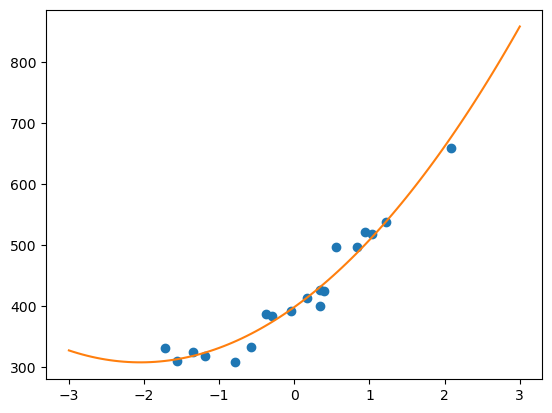

In [17]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

In [18]:
# 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [19]:
# 用随机值初始化参数
theta = np.random.rand(3)

In [20]:
# 均方误差的历史记录
errors = []

In [21]:
# 误差的差值
diff = 1

In [22]:
# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

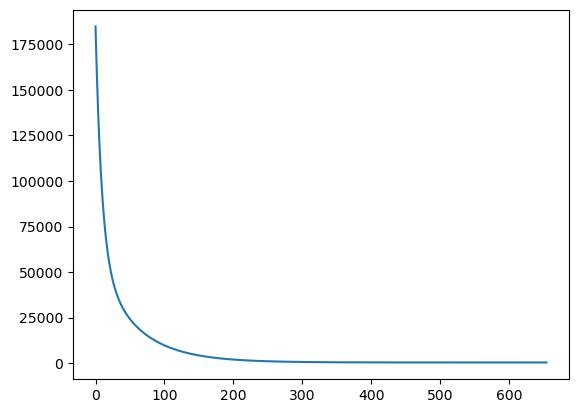

In [23]:
# 绘制误差变化图
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()